# DeepSpeed-MII
在DeepSpeed支持下，DeepSpeed-MII可以进行低延迟和高通量推理。

## 运行web服务

In [ ]:
# DON'T INSTALL USING pip install deepspeed-mii
# git clone https://github.com/microsoft/DeepSpeed-MII.git
# git reset --hard 60a85dc3da5bac3bcefa8824175f8646a0f12203
# cd DeepSpeed-MII && pip install .
# pip3 install -U deepspeed

# ... and make sure that you have same CUDA versions:
# python -c "import torch;print(torch.version.cuda)" == nvcc --version
import mii

mii_configs = {
    "dtype": "fp16",
    'max_tokens': 200,
    'tensor_parallel': 1,
    "enable_load_balancing": False
}
mii.deploy(task="text-generation",
           model="huggyllama/llama-13b",
           deployment_name="llama_13b_deployment",
           mii_config=mii_configs)

## 查询实例

In [ ]:
import mii

generator = mii.mii_query_handle("llama_13b_deployment")
result = generator.query(  
  {"query": ["Funniest joke ever:"]}, 
  do_sample=True,
  max_new_tokens=200
)
print(result)

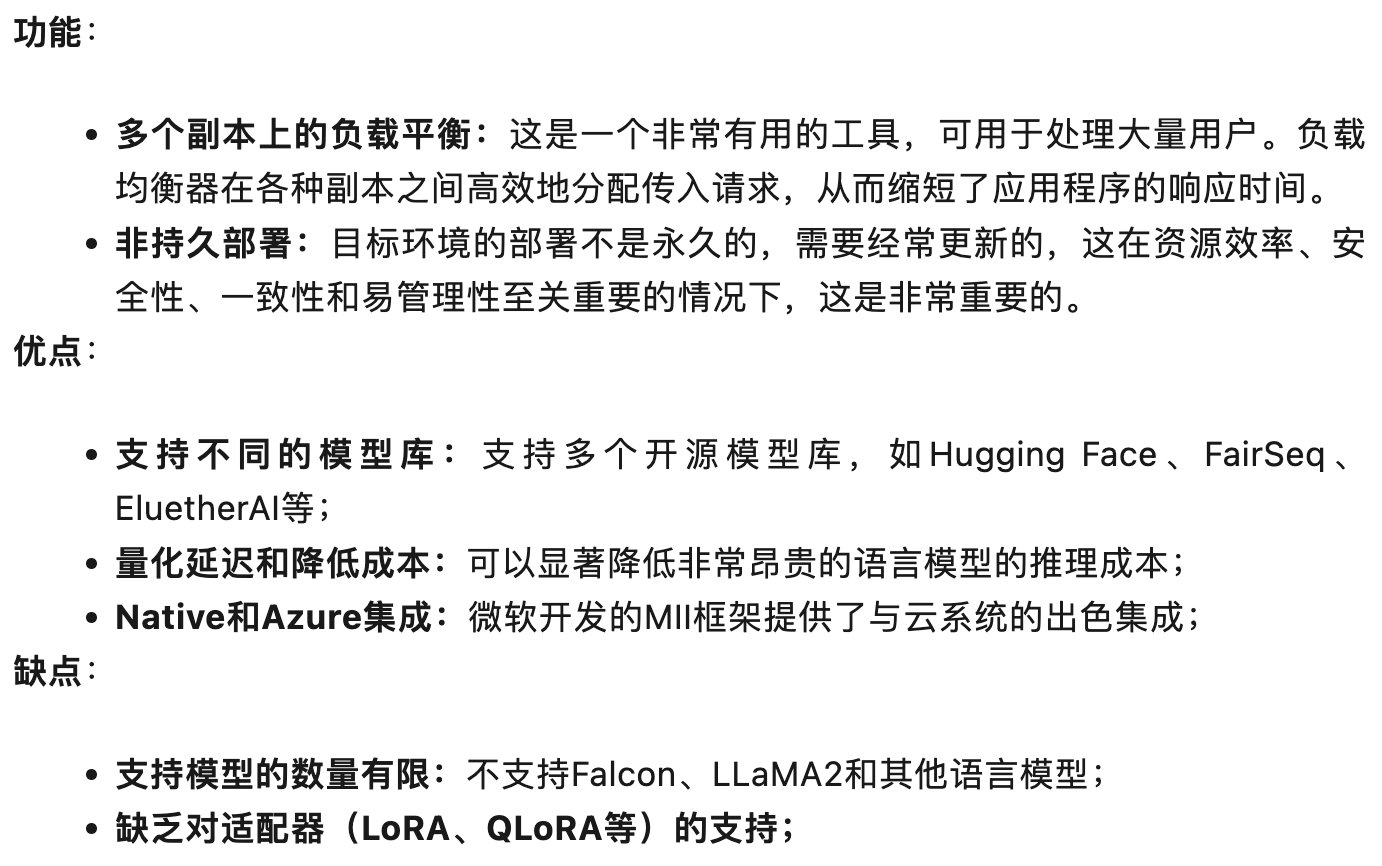